# **Regresión logística**

In [1]:
# Importar librerias
import pandas as pd
from pandas import DataFrame
import numpy as np
from os import listdir
import cv2 as cv

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import plotly.express as px
import time

In [2]:
cwd = os.path.abspath(os.getcwd()) + '\\'
print("CWD =>",cwd)

files = listdir(cwd)
print("Files =>", files)

CWD => d:\Documents\Programming\Repos\IRP-II-2020-Grupo-4\Proyecto 1\Logistic Regression\
Files => ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'LogisticRegression.ipynb', 'LogisticRegressionResults.jpeg']


     0    1    2    3    4    5    6    7    8    9  ...  6903  6904  6905  \
0  255  255  255  255  255  255  255  255  255  252  ...   255   255   255   
1  255  255  255  255  255  255  255  255  251  255  ...   255   255   255   
2  255  255  255  255  255  255  255  255  255  255  ...   254   255   255   
3  255  255  255  255  255  255  255  255  255  253  ...   254   255   255   
4  255  255  255  255  255  255  255  255  253  254  ...   255   255   255   

   6906  6907  6908  6909  6910  6911  etiqueta  
0   255   255   255   255   255   255         0  
1   255   255   255   255   255   255         0  
2   255   255   255   255   255   255         0  
3   255   255   255   255   255   255         0  
4   255   255   255   255   255   255         0  

[5 rows x 6913 columns]


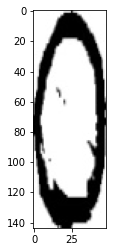

In [5]:
datos = []

columns = [str(index) for index in range(0,(144*48))]
columns += ["etiqueta"]

numberFiles = []

for name in files:
    try:

        numberFiles.append(str(int(name)))

    except ValueError:
        pass

for file in numberFiles: #Vemos todos los folders excepto el ultimo archivo
    path = cwd+file+"\\"
    folderFiles = listdir(path)
    images = []
    for img in folderFiles:
        imgPath = path+img
        datos += [np.append(cv.imread(imgPath,0).flatten(),np.uint(file)).tolist()]

datos = DataFrame(datos,columns=columns)
print(datos.head())

pic1 = np.reshape(datos.values[0][:-1], (144,48))
plt.imshow(pic1, cmap = "gray")

In [6]:
# Revolver el dataset
print(datos.head())
datos = datos.sample(frac=1)
print(datos.head())

     0    1    2    3    4    5    6    7    8    9  ...  6903  6904  6905  \
0  255  255  255  255  255  255  255  255  255  252  ...   255   255   255   
1  255  255  255  255  255  255  255  255  251  255  ...   255   255   255   
2  255  255  255  255  255  255  255  255  255  255  ...   254   255   255   
3  255  255  255  255  255  255  255  255  255  253  ...   254   255   255   
4  255  255  255  255  255  255  255  255  253  254  ...   255   255   255   

   6906  6907  6908  6909  6910  6911  etiqueta  
0   255   255   255   255   255   255         0  
1   255   255   255   255   255   255         0  
2   255   255   255   255   255   255         0  
3   255   255   255   255   255   255         0  
4   255   255   255   255   255   255         0  

[5 rows x 6913 columns]
        0    1    2    3    4    5    6    7    8    9  ...  6903  6904  6905  \
1240  255  252  255  255  253  253  255  253  255  255  ...   255   254   255   
535   255  255  255  255  255  255  255  255

In [7]:
# Al ser numeros en grayscale, los valores van a estar en el rango de 0 a 255, podemos aplicar un escalamiento

X = DataFrame(datos.values[:,:-1])
y = datos["etiqueta"]

X = X/255

# Agrego otra vez la columna de etiquetas
X.insert(X.shape[1],'etiqueta',y.values.tolist(),False)

datos = X

print(X.head())
print(y.head())

     0         1    2    3         4         5    6         7         8  \
0  1.0  0.988235  1.0  1.0  0.992157  0.992157  1.0  0.992157  1.000000   
1  1.0  1.000000  1.0  1.0  1.000000  1.000000  1.0  1.000000  0.996078   
2  1.0  1.000000  1.0  1.0  1.000000  1.000000  1.0  1.000000  0.992157   
3  1.0  1.000000  1.0  1.0  1.000000  1.000000  1.0  1.000000  1.000000   
4  1.0  1.000000  1.0  1.0  1.000000  1.000000  1.0  1.000000  1.000000   

          9  ...      6903      6904      6905      6906      6907      6908  \
0  1.000000  ...  1.000000  0.996078  1.000000  0.325490  0.023529  0.000000   
1  1.000000  ...  0.980392  0.980392  0.992157  1.000000  1.000000  0.996078   
2  0.992157  ...  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3  0.992157  ...  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  1.000000  ...  0.827451  0.572549  0.168627  0.003922  0.341176  1.000000   

       6909      6910  6911  etiqueta  
0  0.000000  0.000000   0.0 

In [8]:
# Declaracion de niveles

A = datos.copy().sample(frac=0.3) # Set A con el 30% de los datos

B = datos.copy().sample(frac=0.6) # Set B con el 60% de los datos

#El ultimo conjunto a probar es el conjunto de datos entero

niveles = { # Diccionario para el acceso a los distintos datasets
    "A": A,
    "B": B,
    "C": datos.copy()
}

for nivel in niveles.keys():
    print(nivel,niveles.get(nivel).shape)

A (884, 6913)
B (1769, 6913)
C (2948, 6913)


In [9]:
#Funcion de utilidad
def partirXY(dataset,targetColumnName):
  '''A partir de un dataset completo, partir y retornar X,Y respectivamente'''
  #print(dataset.columns)
  X = dataset[dataset.columns[:-1]]
  Y = dataset[targetColumnName]
  return X,Y

In [10]:
# Entrenamiento

# Todos los tipos especimenes tienen la misma cantidad, por lo cual no hay oversampling o undersampling

# Contenedor de metricas por nivel
accuracy = []

for key in niveles.keys():

    subconjunto = niveles.get(key)

    X,y = partirXY(subconjunto,'etiqueta')

    X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.70, shuffle=True,random_state=42)

    start = time.perf_counter() # Para cronometrar el entrenamiento

    ###

    model = LogisticRegression()

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    ###

    accuracy += [model.score(X_test,y_test)]

    print(key,round(((X.shape[0]/datos.shape[0])*100),5),"%","("+str(X.shape[0])+"/"+str(datos.shape[0])+")")

    print("Tiempo de ejecución :", round(time.perf_counter() - start,5),"s")

    print("Tasa de aciertos = "+str(round(model.score(X_test,y_test)*100,5)) + "%")

    print('-'*80)

A 29.98643 % (884/2948)
Tiempo de ejecución : 2.49209 s
Tasa de aciertos = 93.60902%
--------------------------------------------------------------------------------
B 60.00678 % (1769/2948)
Tiempo de ejecución : 3.053 s
Tasa de aciertos = 96.23352%
--------------------------------------------------------------------------------
C 100.0 % (2948/2948)
Tiempo de ejecución : 3.69412 s
Tasa de aciertos = 95.9322%
--------------------------------------------------------------------------------


In [11]:
# Graficacion de metricas
print(accuracy)

accuracyFig = px.line(x= list (niveles.keys()),y=accuracy,title="Accuracy",labels={"x":"Dataset","y":"Accuracy Score"})

accuracyFig.show()

[0.9360902255639098, 0.9623352165725048, 0.9593220338983051]
